importing

In [ ]:
import numpy as np
import pandas as pd
from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

In [ ]:
df = pd.read_csv('UNSW_NB15_training-set.csv')

In [ ]:
df.shape

(82332, 45)

In [ ]:
df.info(verbose=True, memory_usage='deep', null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

<ipython-input-65-5d5d4c8e34e3>:1: FutureWarning:

null_counts is deprecated. Use show_counts instead



In [ ]:
df.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.09020,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.00030,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.00510,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.66080,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.00250,...,1,3,0,0,0,2,3,0,Normal,0
5,6,0.000003,udp,-,INT,2,0,784,0,333333.32150,...,1,2,0,0,0,2,2,0,Normal,0
6,7,0.000006,udp,-,INT,2,0,1960,0,166666.66080,...,1,2,0,0,0,2,2,0,Normal,0
7,8,0.000028,udp,-,INT,2,0,1384,0,35714.28522,...,1,3,0,0,0,1,3,0,Normal,0
8,9,0.000000,arp,-,INT,1,0,46,0,0.00000,...,2,2,0,0,0,2,2,1,Normal,0
9,10,0.000000,arp,-,INT,1,0,46,0,0.00000,...,2,2,0,0,0,2,2,1,Normal,0


In [ ]:
df.describe(include='all')

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,82332.000000,82332.000000,82332,82332,82332,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332,82332.000000
unique,NaN,NaN,131,13,7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,43095,47153,39339,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37000,NaN
mean,41166.500000,1.006756,NaN,NaN,NaN,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,...,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,NaN,0.550600
std,23767.345519,4.710444,NaN,NaN,NaN,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,...,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,NaN,0.497436
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,20583.750000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,NaN,0.000000
50%,41166.500000,0.014138,NaN,NaN,NaN,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,...,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,NaN,1.000000
75%,61749.250000,0.719360,NaN,NaN,NaN,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,...,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,NaN,1.000000


preproccesing and feature scaling

In [ ]:
df.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [ ]:
list_drop = ['id','attack_cat']
df.drop(list_drop,axis=1,inplace=True)
#id is not descriptive
#attack_cat is an extension of a target feature which in turn will not give a generalizable model

In [ ]:
#clamping to reduce the skewness in the distribution
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,6.305470e+05,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,2.393001e+06,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,2.112951e+03,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,1.585808e+04,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,2.082111e+07,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [ ]:

DEBUG =0

for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('max = '+str(df_numeric[feature].max()))
        print('75th = '+str(df_numeric[feature].quantile(0.95)))
        print('median = '+str(df_numeric[feature].median()))
        print(df_numeric[feature].max()>10*df_numeric[feature].median())
        print('----------------------------------------------------')
    if df_numeric[feature].max()>10*df_numeric[feature].median() and df_numeric[feature].max()>10 :
        df[feature] = np.where(df[feature]<df[feature].quantile(0.95), df[feature], df[feature].quantile(0.95))

In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.00000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,0.445016,11.84186,9.178424,1580.566135,2866.918367,71576.702810,180.967667,95.713003,4.649418e+07,3.105380e+05,...,4.466611,3.388901,7.160679,0.008284,0.008381,0.092066,5.974809,8.832532,0.011126,0.550600
std,0.672222,15.66461,14.504212,2948.850472,7525.606738,102631.946851,101.513358,116.667722,7.417784e+07,8.918691e+05,...,6.685037,5.029129,10.481621,0.091171,0.092485,0.289121,6.867156,10.124902,0.104891,0.497436
min,0.000000,1.00000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.00000,0.000000,114.000000,0.000000,28.606114,62.000000,0.000000,1.120247e+04,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.014138,6.00000,2.000000,534.000000,178.000000,2650.176667,254.000000,29.000000,5.770032e+05,2.112951e+03,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,0.719360,12.00000,10.000000,1280.000000,956.000000,111111.107200,254.000000,252.000000,6.514286e+07,1.585808e+04,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,2.403792,60.00000,54.000000,12472.000000,30622.000000,333333.321500,255.000000,253.000000,2.666667e+08,3.741446e+06,...,25.000000,18.000000,37.000000,2.000000,2.000000,1.000000,25.000000,36.000000,1.000000,1.000000


In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
df_before = df_numeric.copy()
DEBUG = 0
for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_numeric[feature].nunique()))
        print(df_numeric[feature].nunique()>50)
        print('----------------------------------------------------')
    if df_numeric[feature].nunique()>50:
        if df_numeric[feature].min()==0:
            df[feature] = np.log(df[feature]+1)
        else:
            df[feature] = np.log(df[feature])

df_numeric = df.select_dtypes(include=[np.number])

In [ ]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,131,13,7
top,tcp,-,FIN
freq,43095,47153,39339


In [ ]:
DEBUG = 0
for feature in df_cat.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_cat[feature].nunique()))
        print(df_cat[feature].nunique()>6)
        print(sum(df[feature].isin(df[feature].value_counts().head().index)))
        print('----------------------------------------------------')

    if df_cat[feature].nunique()>6:
        df[feature] = np.where(df[feature].isin(df[feature].value_counts().head().index), df[feature], '-')

In [ ]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,6,5,6
top,tcp,-,FIN
freq,43095,49275,39339


In [ ]:
df['proto'].value_counts().head().index

Index(['tcp', 'udp', '-', 'unas', 'arp'], dtype='object')

In [ ]:
df['proto'].value_counts().index

Index(['tcp', 'udp', '-', 'unas', 'arp', 'ospf'], dtype='object')

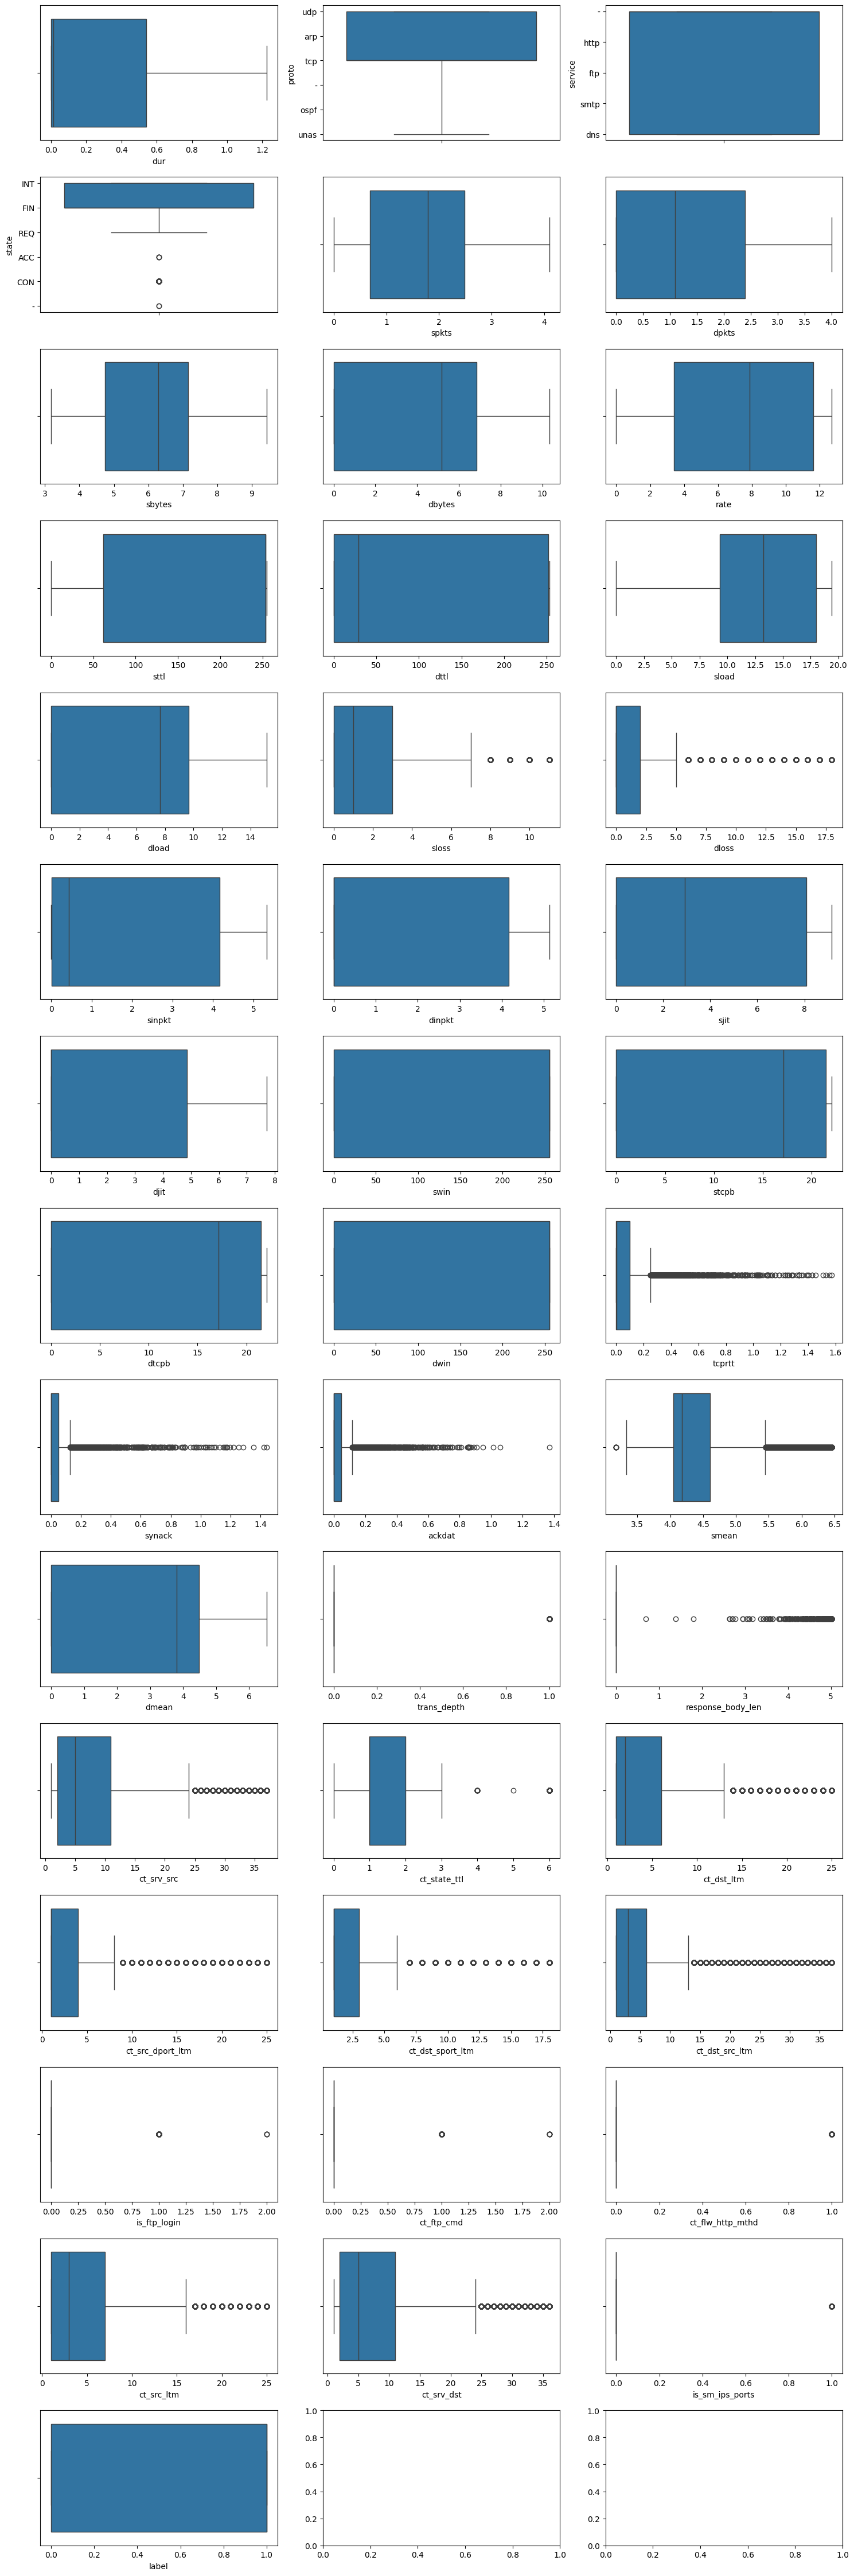

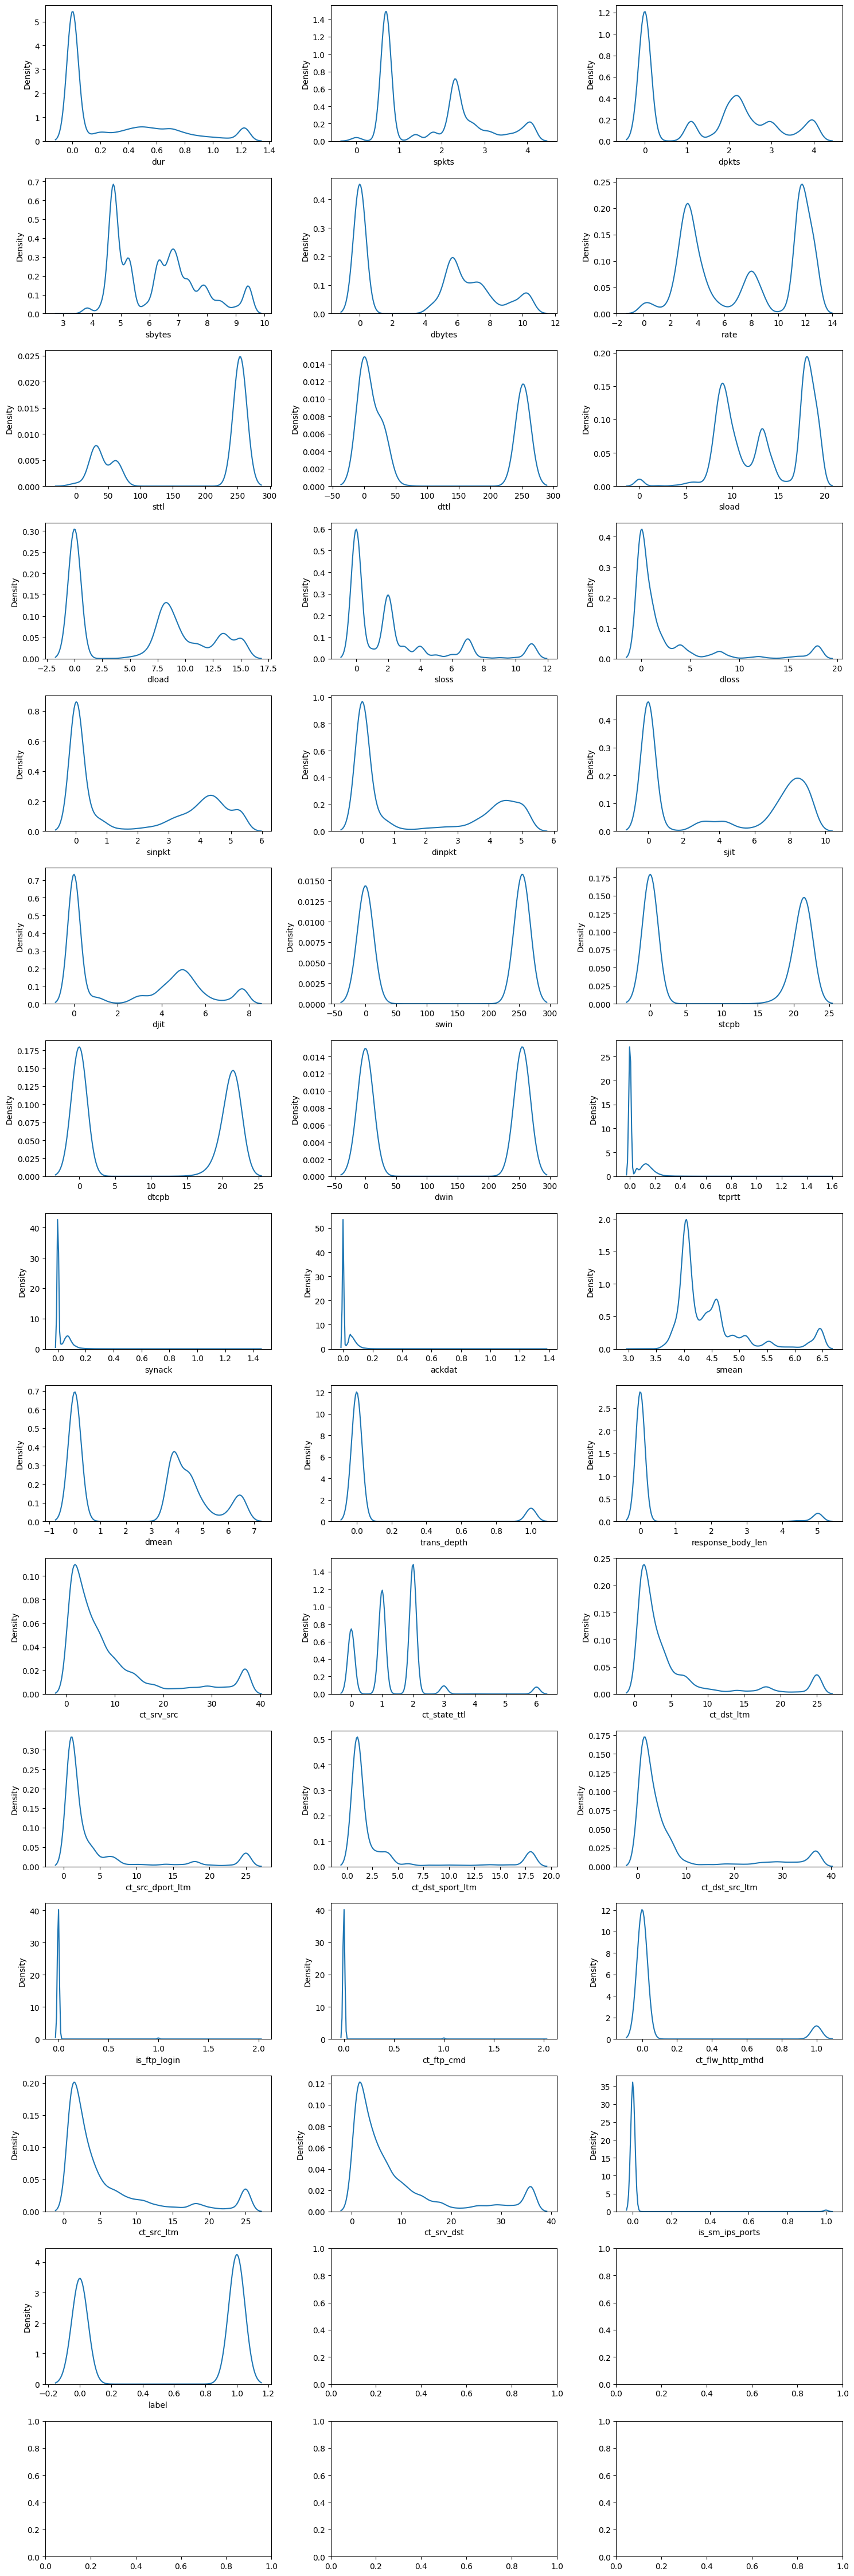

In [ ]:
#data density and distribution
import matplotlib.pyplot as plt
import seaborn as sns
df_numeric = df.select_dtypes(include=['number'])
fig, axes = plt.subplots(nrows=15, ncols=3, figsize=(15, 45))
# Box plots
for i, col in enumerate(df.columns):
    if df[col].dtype == 'object':  # Check if the column is categorical
        sns.boxplot(y=df[col], ax=axes[i // 3, i % 3])
    else:
        sns.boxplot(x=df[col], ax=axes[i // 3, i % 3])
plt.tight_layout()
plt.show()
fig, axes = plt.subplots(nrows=15, ncols=3, figsize=(15, 45))
for i, col in enumerate(df_numeric.columns):
    sns.kdeplot(data=df[col], ax=axes[i // 3, i % 3])
plt.tight_layout()
plt.show()

<ipython-input-80-090ba22c08bb>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



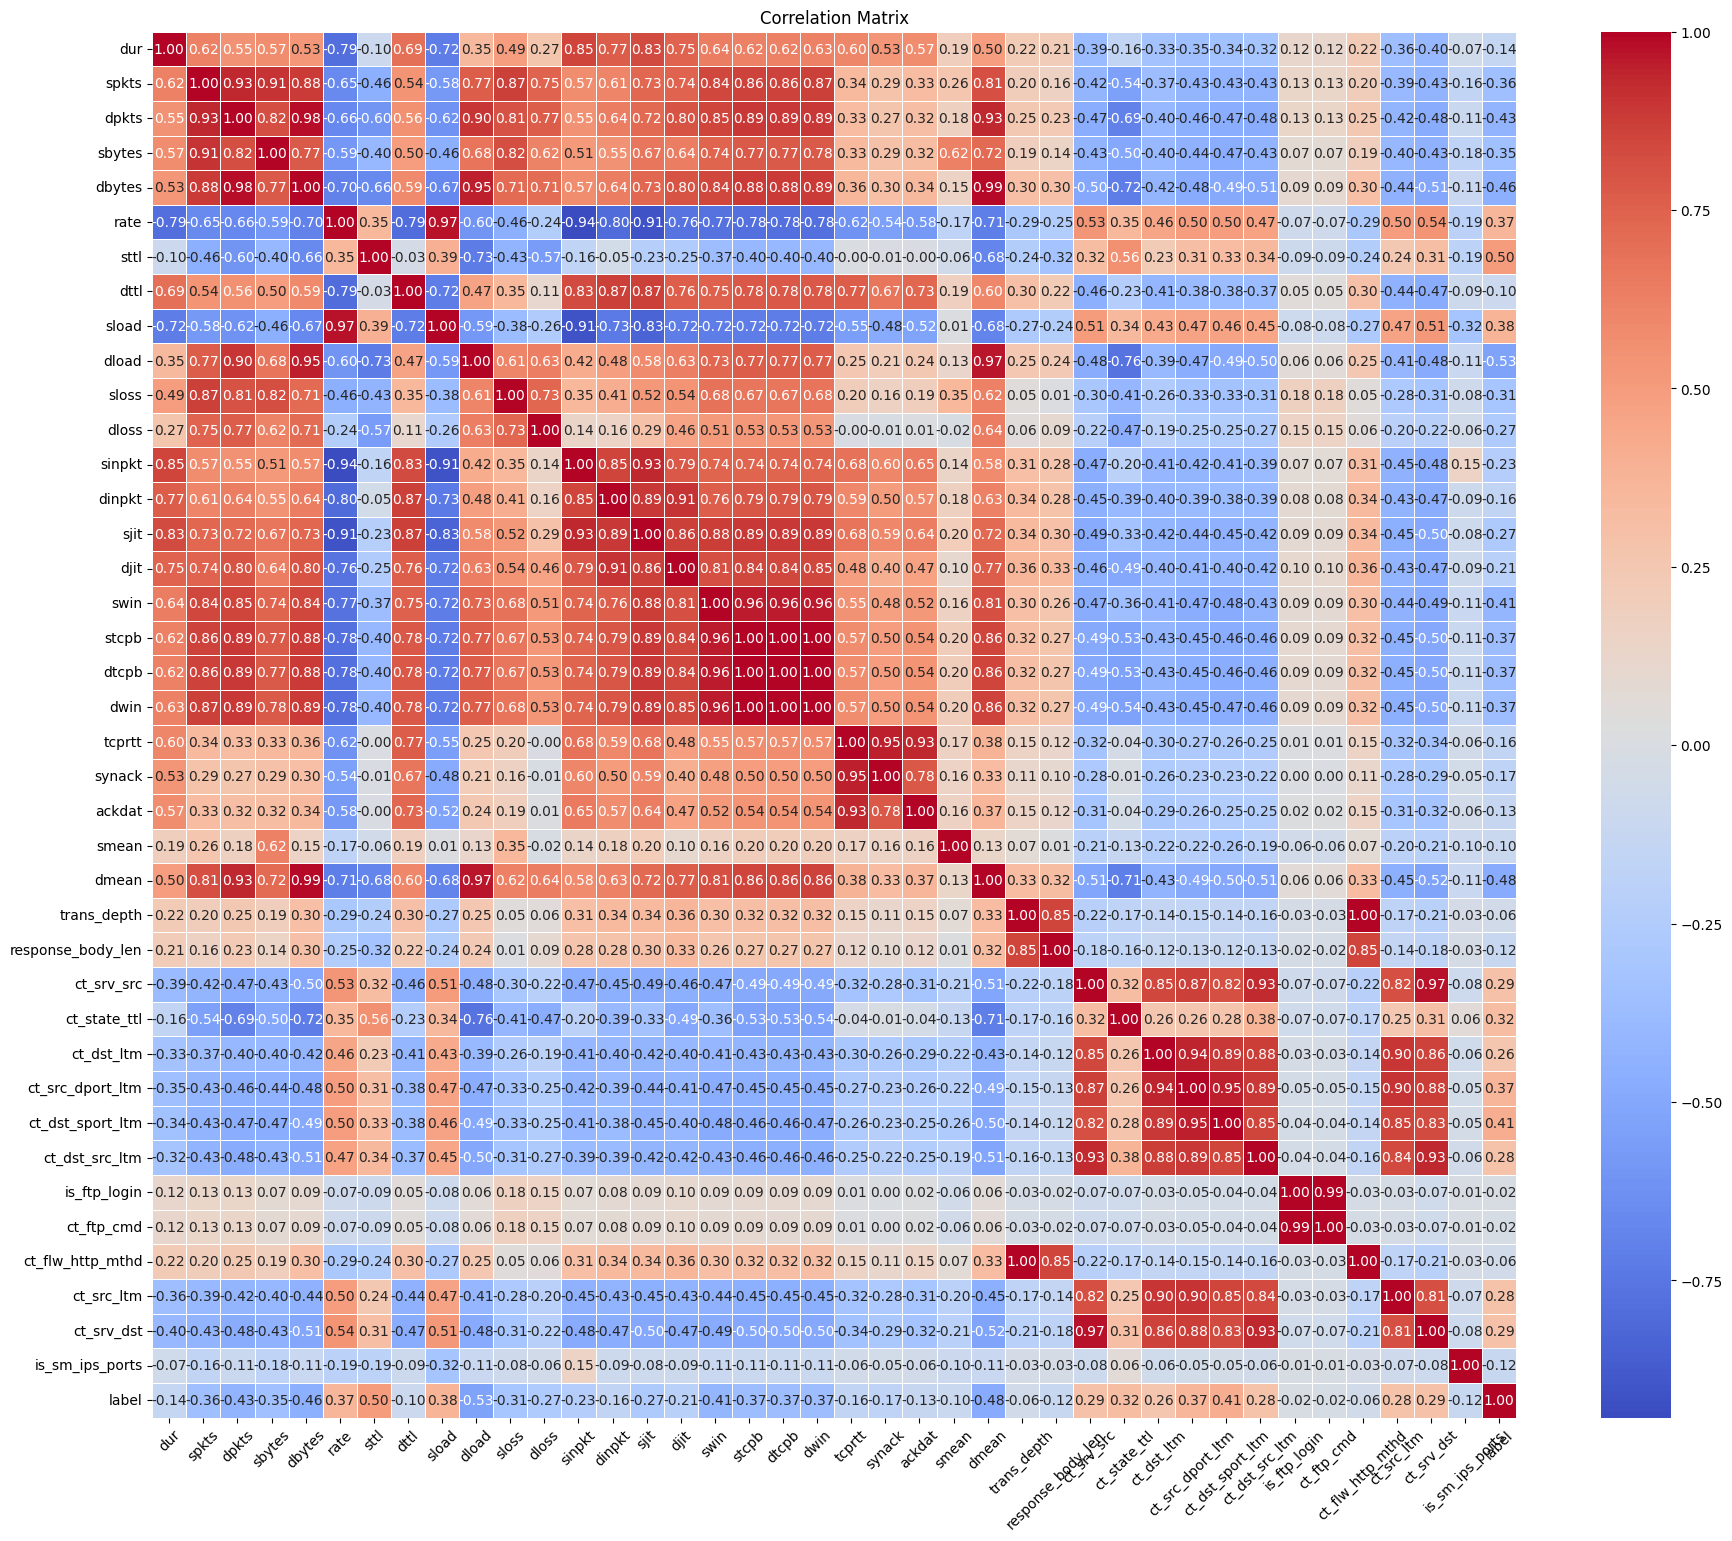

In [ ]:
# Compute correlation matrix
correlation_matrix = df.corr()
# Plot heatmap
plt.figure(figsize=(22, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

best_features = SelectKBest(score_func=chi2,k='all')

X = df.iloc[:,4:-2]
y = df.iloc[:,-1]
fit = best_features.fit(X,y)

df_scores=pd.DataFrame(fit.scores_)
df_col=pd.DataFrame(X.columns)

feature_score=pd.concat([df_col,df_scores],axis=1)
feature_score.columns=['feature','score']
feature_score.sort_values(by=['score'],ascending=True,inplace=True)

fig = go.Figure(go.Bar(
            x=feature_score['score'][0:21],
            y=feature_score['feature'][0:21],
            orientation='h'))

fig.update_layout(title="Top 20 Features",
                  height=1200,
                  showlegend=False,
                 )

fig.show()

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X.head()
feature_names = list(X.columns)
np.shape(X)

(82332, 42)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
np.shape(X)

(82332, 56)

In [ ]:
df_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,6,5,6
top,tcp,-,FIN
freq,43095,49275,39339


In [ ]:
for label in list(df_cat['state'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)

for label in list(df_cat['service'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)

for label in list(df_cat['proto'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)

In [ ]:
len(feature_names)

56

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 0,
                                                    stratify=y)

In [ ]:
df_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,6,5,6
top,tcp,-,FIN
freq,43095,49275,39339


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 18:] = sc.fit_transform(X_train[:, 18:])
X_test[:, 18:] = sc.transform(X_test[:, 18:])

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(
    n_estimators=180,
    criterion='gini',
    max_depth=40,
    random_state=1
)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report_str)

Accuracy: 0.9765

Confusion Matrix:
[[7253  147]
 [ 240 8827]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      7400
           1       0.98      0.97      0.98      9067

    accuracy                           0.98     16467
   macro avg       0.98      0.98      0.98     16467
weighted avg       0.98      0.98      0.98     16467



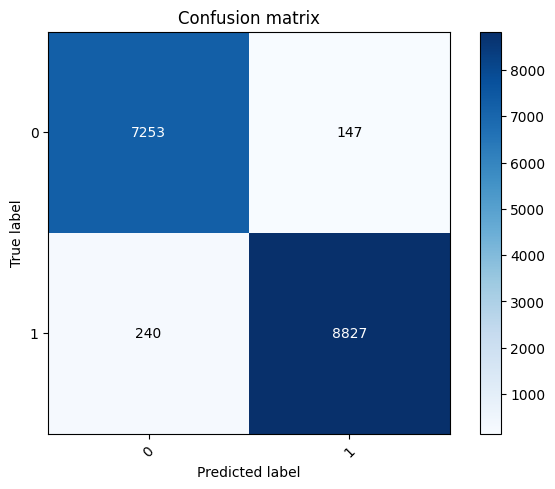

True Negatives: 7253
False Positives: 147
False Negatives: 240
True Positives: 8827


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have trained your Random Forest classifier (rf_classifier) and obtained predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(cm, classes=rf_classifier.classes_)

tn, fp, fn, tp = cm.ravel()
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)


# KNN

Accuracy: 95.04%
Recall: 95.04%
Precision: 95.09%
F1-Score: 95.05%
Time to train: 0.01 s
Time to predict: 10.00 s
Total time: 10.01 s

Confusion Matrix:


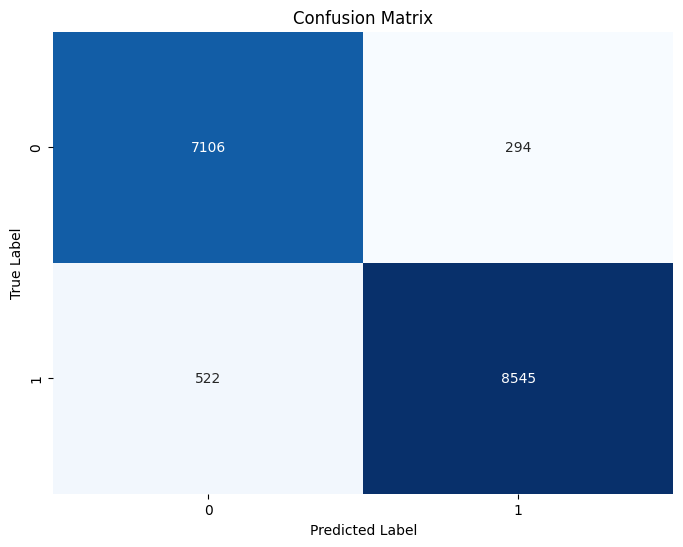

In [ ]:
import time
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

# Initialize DataFrame to store model performance
model_performance = pd.DataFrame(columns=['Accuracy', 'Recall', 'Precision', 'F1-Score', 'time to train', 'time to predict', 'total time'])

# Train the model and evaluate its performance
start = time.time()
model = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
end_train = time.time()

y_predictions = model.predict(X_test)
end_predict = time.time()

accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

conf_matrix = confusion_matrix(y_test, y_predictions)

# Print performance metrics
print("Accuracy: {:.2%}".format(accuracy))
print("Recall: {:.2%}".format(recall))
print("Precision: {:.2%}".format(precision))
print("F1-Score: {:.2%}".format(f1s))
print("Time to train: {:.2f} s".format(end_train - start))
print("Time to predict: {:.2f} s".format(end_predict - end_train))
print("Total time: {:.2f} s".format(end_predict - start))
print("\nConfusion Matrix:")
# Convert confusion matrix to a string
conf_matrix_str = str(conf_matrix)

# Store performance metrics in DataFrame
model_performance.loc['kNN', ['Accuracy', 'Recall', 'Precision', 'F1-Score', 'time to train', 'time to predict', 'total time']] = [accuracy, recall, precision, f1s, end_train-start, end_predict-end_train, end_predict-start]

# Add columns for confusion matrix
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        model_performance.loc['kNN', f'conf_matrix_{i}_{j}'] = conf_matrix[i, j]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
import xgboost as xgb

xg = xgb.XGBClassifier(n_estimators=10)
xg.fit(X_train, y_train)
xg_score = xg.score(X_test, y_test)
y_predict = xg.predict(X_test)
y_true = y_test


# XGBoost

Accuracy of XGBoost: 0.9571263739600413
Precision of XGBoost: 0.9572029599504402
Recall of XGBoost: 0.9571263739600413
F1-score of XGBoost: 0.9571451884386675
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7400
           1       0.96      0.96      0.96      9067

    accuracy                           0.96     16467
   macro avg       0.96      0.96      0.96     16467
weighted avg       0.96      0.96      0.96     16467



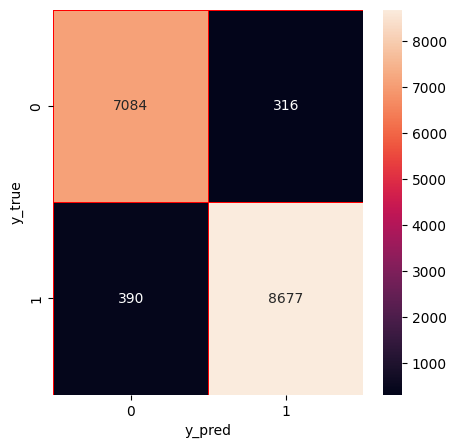

Accuracy of XGBoost: 0.9571263739600413
Precision of XGBoost: 0.9572029599504402
Recall of XGBoost: 0.9571263739600413
F1-Score of XGBoost: 0.9571451884386675


In [ ]:
import xgboost as xgb
from sklearn.metrics import precision_recall_fscore_support

xg = xgb.XGBClassifier(n_estimators=10)
xg.fit(X_train, y_train)
xg_score = xg.score(X_test, y_test)
y_predict = xg.predict(X_test)
y_true = y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

print('Accuracy of XGBoost: ' + str(xg_score))

# Compute precision, recall, F1-score, and support
precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_predict, average='weighted')

print('Precision of XGBoost: ' + str(precision))
print('Recall of XGBoost: ' + str(recall))
print('F1-Score of XGBoost: ' + str(fscore))